<a href="https://colab.research.google.com/github/pragyakhanna11/MLnow_2.0/blob/main/3a_Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Univariate Linear Regression

## Load the dataset and perform pre-processing tasks:

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os 

In [3]:
population = pd.read_csv('/content/drive/MyDrive/Datasets/popularity.csv')
population.head()

,Unnamed: 0,avg_shares,avg_comments,avg_expert,popularity_score
0,19,147.3,23.9,19.1,14.6
1,91,28.6,1.5,33.0,7.3
2,166,17.9,37.6,21.6,8.0
3,196,94.2,4.9,8.1,9.7
4,42,293.6,27.7,1.8,20.7


### Remove the first column of ‘Unnamed: 0’

In [4]:
population.drop('Unnamed: 0', axis=1, inplace=True)
population.head()

,avg_shares,avg_comments,avg_expert,popularity_score
0,147.3,23.9,19.1,14.6
1,28.6,1.5,33.0,7.3
2,17.9,37.6,21.6,8.0
3,94.2,4.9,8.1,9.7
4,293.6,27.7,1.8,20.7


## Detect missing values, and replace them with the mean.

In [5]:
population.isnull().sum()

avg_shares          1
avg_comments        4
avg_expert          0
popularity_score    0
dtype: int64

In [6]:
population.mean()

avg_shares          147.291457
avg_comments         23.319388
avg_expert           30.554000
popularity_score     14.022500
dtype: float64

In [7]:
population.fillna(population.mean(), inplace=True)
population.isnull().sum()

avg_shares          0
avg_comments        0
avg_expert          0
popularity_score    0
dtype: int64

### Draw box-plots for each attribute to detect if there are any outliers.

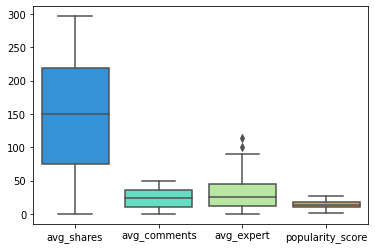

In [ ]:
sns.boxplot(data=population, palette='rainbow')

**We observe there are few outliers in avg_expert column**

### Normalize all attributes within the range of 0 to 1.

In [8]:
from sklearn import preprocessing

In [9]:
name = population.columns
norm_df = pd.DataFrame(preprocessing.normalize(population), columns= name)
norm_df.head()

,avg_shares,avg_comments,avg_expert,popularity_score
0,0.974525,0.158121,0.126364,0.096592
1,0.645597,0.033860,0.744919,0.164785
2,0.376136,0.790096,0.453885,0.168105
3,0.989807,0.051487,0.085111,0.101923
4,0.993117,0.093697,0.006089,0.070019


## Visualize the relationship of each attribute with the target attribute. (Popularity_score)

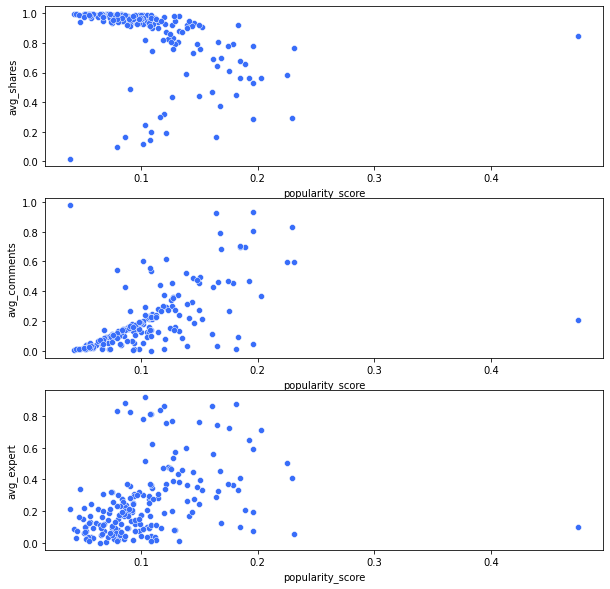

In [16]:
fig, axarr = plt.subplots(3, figsize=(10,10))
sns.scatterplot(y='avg_shares', x='popularity_score',data=norm_df ,hue=None, ax=axarr[0])
sns.scatterplot(y='avg_comments', x='popularity_score', data=norm_df, ax=axarr[1])
sns.scatterplot(y='avg_expert', x='popularity_score', data=norm_df, ax=axarr[2])

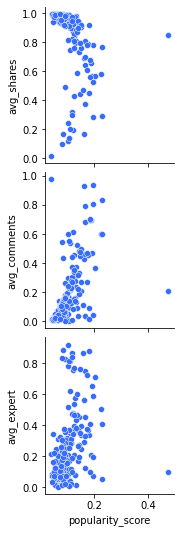

In [15]:
sns.pairplot(norm_df, x_vars=['popularity_score'], y_vars=['avg_shares', 'avg_comments', 'avg_expert'])

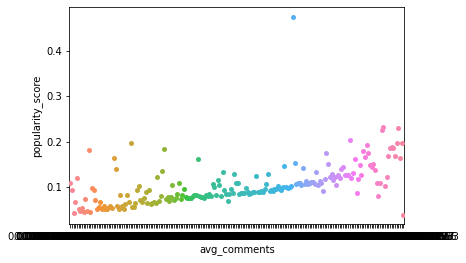

In [18]:
sns.stripplot(y='popularity_score', x='avg_comments', data=norm_df)

## 3. Split the dataset into train and test, into 70% and 30% respectively. 

In [47]:
feature_cols = ['avg_shares', 'avg_comments', 'avg_expert']
X = norm_df[feature_cols[1]]
X

0      0.158121
1      0.033860
2      0.790096
3      0.051487
4      0.093697
         ...   
195    0.832617
196    0.314961
197    0.024477
198    0.013477
199    0.161204
Name: avg_comments, Length: 200, dtype: float64

In [38]:
Y = norm_df['popularity_score']

In [39]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,
 test_size=0.3, 
 random_state=123)

In [23]:
X_train.shape

(140, 3)

In [24]:
X_test.shape

(60, 3)

In [49]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

In [50]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [51]:
numEpochs = 300
history = model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = numEpochs)

Epoch 1/300
5/5 [==============================] - 1s 40ms/step - loss: 0.2051 - mae: 0.2051 - mse: 0.1014 - val_loss: 0.2786 - val_mae: 0.2786 - val_mse: 0.1811
Epoch 2/300
5/5 [==============================] - 0s 7ms/step - loss: 0.2017 - mae: 0.2017 - mse: 0.0986 - val_loss: 0.2739 - val_mae: 0.2739 - val_mse: 0.1772
Epoch 3/300
5/5 [==============================] - 0s 7ms/step - loss: 0.1985 - mae: 0.1985 - mse: 0.0961 - val_loss: 0.2695 - val_mae: 0.2695 - val_mse: 0.1735
Epoch 4/300
5/5 [==============================] - 0s 8ms/step - loss: 0.1956 - mae: 0.1956 - mse: 0.0939 - val_loss: 0.2654 - val_mae: 0.2654 - val_mse: 0.1699
Epoch 5/300
5/5 [==============================] - 0s 7ms/step - loss: 0.1927 - mae: 0.1927 - mse: 0.0917 - val_loss: 0.2615 - val_mae: 0.2615 - val_mse: 0.1663
Epoch 6/300
5/5 [==============================] - 0s 7ms/step - loss: 0.1899 - mae: 0.1899 - mse: 0.0895 - val_loss: 0.2576 - val_mae: 0.2576 - val_mse: 0.1629
Epoch 7/300
5/5 [================

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


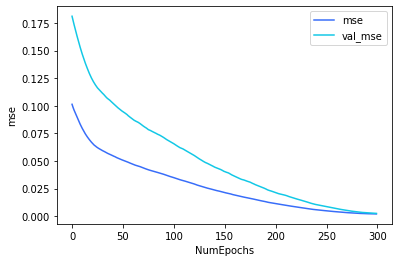

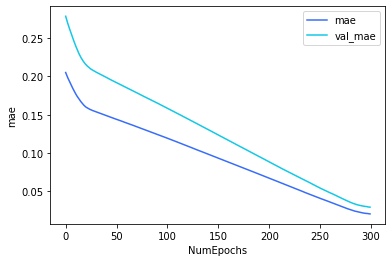

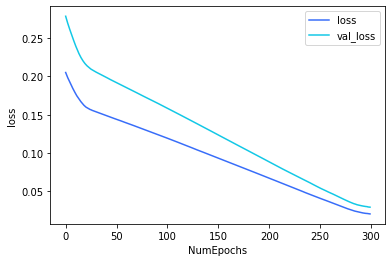

In [53]:
# tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [56]:
print(f'Prediction for input value 1: {model.predict([1])}')

# for a list of values
tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}

List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[0.31129795]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[0.31129795]
 [0.5736828 ]
 [0.8360676 ]
 [1.0984524 ]
 [1.3608373 ]]

List of Predictions (flattened out):
[0.31129795 0.5736828  0.8360676  1.0984524  1.3608373 ]



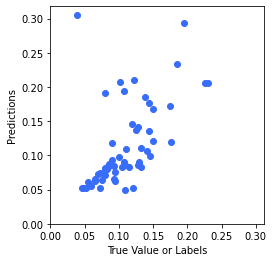

In [57]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

testPreds = model.predict(X_test).flatten()
predPlot(y_test, testPreds)

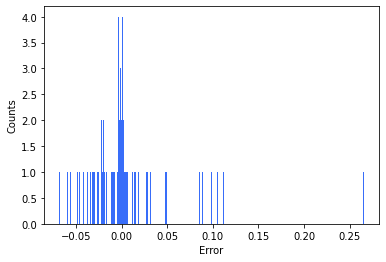

In [59]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, y_test, numEpochs)